# Logistic Regression and Gradient Descent

Aims:

* Implement batch gradient descent for a logistic regression model
* Review of cost function for classification problems
* Review matrix dot products with `numpy`
* Further practice with pandas and pyplot
* Implementing a class in Python

You will need to fill in parts that say 
    # INSERT CODE HERE
    
where possible the exercises will indicate the expected output for you to check your work.

## Part A: Review of Logistic Regression

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data loading

In [40]:
def get_data():
    '''Load classification data for the exercise.
    
    Returns:
    data : pandas DataFrame
    '''
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, n_classes=2, random_state=42, n_clusters_per_class=1)
    
    df = pd.DataFrame(X, columns=['feature_'+str(i) for i in range(10)])
    df['target'] = y
    return df

In [41]:
# Get the data. df is a pandas dataframe. 
df = get_data()
X = df[df.columns.difference(['target'])]
y = df.target

In [42]:
# (rows, columns)
df.shape

(1000, 11)

`df` is a DataFrame with 500 rows and 11 columns, including the target column.

In [43]:
# Examine the target column
df.target.value_counts()

1    502
0    498
Name: target, dtype: int64

In this binary classification dataset we have 502 positive examples and 498 negative examples.

**Question:** Is this a balanced dataset? What precautions do we have to take if a classification dataset is not balanced?

**INSERT ANSWER HERE**

## 2. Data exploration

Let's begin by taking a look at the first few rows of data.

In [44]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-3.358483,3.159918,0.827163,0.069638,-6.715639,-2.708559,0.183206,1.113502,1.730759,1.228394,1
1,2.071819,-4.055419,-2.615940,-2.599432,3.053752,0.366795,-0.392171,-1.191720,-1.220516,1.899925,0
2,-0.633460,0.712482,2.024390,-0.432639,-1.307929,0.419320,-1.469510,-0.719051,1.155005,2.018026,0
3,-0.464478,0.892442,2.521010,2.766580,-1.933734,-1.418018,1.391760,-2.430279,1.308295,-0.270896,1
4,1.042426,-1.192605,-2.071386,-0.131231,0.545377,0.379060,-0.062978,-1.325591,2.037936,0.115414,0


As you will have previously seen, it is a good idea to make some simple plots of the various input features (where you are able!) to get a feel for the dataset. 

**Hints:**
* Making more compact visualisations with subplots
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

* The seaborn package is also an excellent visualisation tool. Here are some examples of useful visuals for categorical data 
https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial

In [45]:
# INSERT CODE HERE

## 3. Defining the model and cost function

### Logistic Regression

We will model the data using logistic regression.
The predictions $\hat{y}^i$ are given by the logistic model

$\hat{y}^i=\sigma(\sum_j w_j^{\phantom{}}x^i_j)$,   $\quad\quad\quad(1)$

where

$\sigma(x)=1/(1+\exp^{-x})$, $\quad\quad\quad(2)$

Notation explained:

* The superscript $i$ denotes the $i$-th example (or row) in the dataset.
* The subscript $j$ denotes the $j$-th feature (or column) in the dataset.
* $w_j$ are the parameters of the model and indicate the dependence of $\hat{y}$ on $x_j$.

As a matrix dot product, we can write

$\hat{y}=\sigma(X\cdot\mathbf{w})$,   $\quad\quad\quad(2)$

where $X$ is a matrix with shape `(n samples, n features)` and $\mathbf{w}$ is the weights vector of length `n features`.

Define a `predict(X,w)` method that calculates the logistic regression model for a given input of X and w.

It is useful to define a separate sigmoid function using the numpy `exp` method. The advantage of using the numpy implementation instead of `math.exp` is that it can perform an element-wise operation on all elements of an n-dimensional array.
https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x)) # INSERT CODE HERE

In [47]:
# test function
sigmoid(np.array([-0.5, 0, 1]))

array([0.37754067, 0.5       , 0.73105858])

Expected output:

    array([0.37754067, 0.5       , 0.73105858])

In [48]:
# Define a function that calculates the linear regression model. This will come in useful later.
def predict(X, w):
    '''The logistic regression model as defined in Equation (1).
    It takes X and w as inputs and returns a 1d-array of predictions.

    Parameters:
    X : 2d-array, shape=(n_samples,n_features)
    w : 1d-array, shape=(n_features,)

    Returns:
    ypred : 1d-array, shape=(n_samples,)
    '''
    # Check that the number of features in X is equal to the number features in the weights vector
    assert X.shape[1] == len(w)

    ypred = sigmoid(X.dot(w))# INSERT CODE HERE
    
    # Check that the number of predictions made is equal to the number of samples in X
    assert len(ypred) == X.shape[0]

    return ypred

In [49]:
# Test your function with these example values of w
w = np.linspace(0, 1, 10)
predict(X, w)[:5]

0    0.456036
1    0.329440
2    0.823789
3    0.466054
4    0.661577
dtype: float64

Expected output:
    
    array([0.45603552, 0.32943956, 0.8237889 , 0.46605423, 0.66157655])

### Cost function
In order to find the values of $\mathbf{w}$ that best represent the data we need to define a cost function that quantifies how far away our estimate of $\hat{y}$ differs from the true values $y$.

For logistic regression the cost function to be minimised is the **cross-entropy** between the true $y^i$ and predicted $\hat{y}^i$ values:

$J(\mathbf{w})=-\frac{1}{m}\sum^m_{i=1} \left[y^i \log \hat{y}^i + (1-y^i) \log(1-\hat{y}^i)\right]$. $\quad\quad\quad(4)$

* We sum the entropy over all samples from $i=1$ to $i=m$, where $m$ is the number of samples in the data.

**Question:** Explain what each term of the loss function does.
(a) how do mis-classified positive and negative examples increase the loss?
(b) how do correctly classified positive and negative examples decrease the loss?

**ANSWER:**

    INSERT ANSWER HERE

Define a `cost_function(ypred, y)` method that calculates the cost function in Equation (4).

In [50]:
def safe_log(x):
    return np.where(x==0, np.log(x+1e-10), np.log(x))

In [51]:
def cost_function(ypred, y):
    '''The cost function J(w) as defined in Equation (4).

    Parameters:
    ypred : 1d-array, y values predicted by model 
    y : 1d-array, true y values

    Returns:
    float, J (the cost)
    '''
    # m is the number of samples
    m = len(ypred)# INSERT CODE HERE
    
    # J is the cost
    J = -1/m * np.sum(y * safe_log(ypred) + (1-y)*safe_log(1-ypred))# INSERT CODE HERE
    
    # Check that J is a scalar
    assert J.shape == ()

    return J

In [52]:
ypred = predict(X, w)
cost_function(ypred, y)

1.404926243799119

Expected output:

    1.404926243799119

## 4. Batch Gradient Descent 

The goal of gradient descent is to find the values of $\mathbf{w}$ that **minimise** the cost function $J$. 

The minimum is found by evaluating the _gradient_ $\frac{dJ}{d\mathbf{w}}$ at a given $\mathbf{w}$ value, and taking a small step, the _learning rate_ $\alpha$, against it.

There are many different gradient descent algorithms. Here we will implement the **batch gradient descent algorithm**. In batch gradient descent, we will use all the examples in the sample at each iteration to update $w_0$ and $w_1$.

The algorithm goes as follows:
1. Initialise $\mathbf{w}$ with random values.
2. Calculate the gradients $\frac{dJ}{dw_i}$ at this point.
3. Update the value of each parameter $\mathbf{w}$ using the update equations

  $w_i := w_i - \alpha \frac{dJ}{dw_i}$, $\quad\quad\quad(5)$

4. Repeat steps 2 and 3 until the change in $\mathbf{w}$ is small.


Let's implement each step in turn.

### Step 1: Initialise w with random values

In [15]:
def initialise_w(n_features):
    '''Initialise the weights vector w with random values.

    Parameters:
    n_features : int, number of features 

    Returns:
    w : 1d-array
    '''
    # Set a seed so we get predictable values
    np.random.seed(1)

    # create a random numpy array of features of length n_features
    w = np.random.rand(n_features)# INSERT CODE HERE
    
    # Check that w has the right shape
    assert w.shape == (n_features,)

    return w

In [53]:
# Test the initialise_w method
w = initialise_w(X.shape[1])
print('w = [{:.4f},{:.4f}]'.format(w[0], w[1]))

ypred = predict(X, w)
print('yhat[0]={:.4f}'.format(ypred[0]))

cost = cost_function(ypred, y)
print('Cost={:.4f}'.format(cost))

w = [0.4170,0.7203]
yhat[0]=0.8067
Cost=0.7767


Expected output:
```
w = [0.4170,0.7203]
yhat[0]=0.8067
Cost=0.7767
```

### Step 2: Calculate the gradient of J

Recalling Equations (1) and (4):

$\hat{y}^i=\sigma(\sum_j w_j^{\phantom{}}x^i_j)$,   $\quad\quad\quad(1)$

$J(\mathbf{w})=-\frac{1}{m}\sum^m_{i=1} \left[y^i \log \hat{y}^i + (1-y^i) \log(1-\hat{y}^i)\right]$. $\quad\quad\quad(4)$

Evaluate the gradient $\frac{dJ}{dw_i}$. You may need some pen and paper for this part.

In [54]:
def calc_dJ_dw(X, y, w):
    '''Function to calculate dJ/dw

    Parameters:
    X : 2d-array, feature matrix
    y : 1d-array, true y values
    w : 1d-array, linear regression model weights

    Returns:
    dJ_dw : 1d-array
    '''
    # Number of samples
    m = len(y)
    
    ypred = predict(X,w) # INSERT CODE HERE
    
    dJ_dw = np.dot(X.T, (ypred - y)) / y.shape[0] # INSERT CODE HERE

    # Check that dJ_dw has the right shape
    assert dJ_dw.shape == w.shape

    return dJ_dw

In [55]:
# Check the calc_dJ_dw method
dJ_dw = calc_dJ_dw(X, y, w)
print('dJ/dw = [dJ/dw_0, dJ/dw_1] =', dJ_dw)

dJ/dw = [dJ/dw_0, dJ/dw_1] = [ 0.49369713 -0.21468038 -0.31495645 -0.35295134  0.78093749  0.44299134
 -0.35397491  0.04493079  0.22469626  0.34793172]


Expected output:

    dJ/dw = [dJ/dw_0, dJ/dw_1] = [ 0.49369713 -0.21468038 -0.31495645 -0.35295134  0.78093749  0.44299134
    -0.35397491  0.04493079  0.22469626  0.34793172]
 

### Step 3: Update the value of w

With the gradients in hand we can update the value of $\mathbf{w}$ using the update equations

  $w_0 := w_0 - \alpha \frac{dJ}{dw_0}$, $\quad\quad\quad(5)$

  $w_1 := w_1 - \alpha \frac{dJ}{dw_1}$. $\quad\quad\quad(6)$
  
This improves our estimate of $\mathbf{w}$ by taking a step of size $\alpha$ "downhill" towards the minimum.

In [19]:
def update_w(w, alpha, dJ_dw):
    '''Update the weights vector w.
    
    Parameters:
    w : 1d-array, weights vector
    alpha : float, learning rate
    dJ_dw : 1d-array, gradients vector
    
    Returns:
    new_w : 1d-array, updated weights vector
    '''    
    new_w = w - np.dot(alpha, dJ_dw) # INSERT CODE HERE
    
    # Check the dimensions of new_w
    assert new_w.shape == w.shape
    
    return new_w

Let's try taking one iteration of batch gradient descent. 

As a reminder, the algorithm goes as follows:
1. Initialise $\mathbf{w}=[w_0, w_1]$ with random values.
2. Calculate the gradients $\frac{dJ}{dw_0}$, $\frac{dJ}{dw_1}$ at this point.
3. Update the value of $\mathbf{w}$ using the update equations $w_0 := w_0 - \alpha \frac{dJ}{dw_0}$, $w_1 := w_1 - \alpha \frac{dJ}{dw_1}$. 


In [56]:
# Initialise w to random value
w = initialise_w(X.shape[1])# INSERT CODE HERE

# Calculate the gradient
dJ_dw = calc_dJ_dw(X, y, w)# INSERT CODE HERE

# Set the value of alpha to 0.01
alpha = 0.01

# Update w
new_w = update_w(w,alpha,dJ_dw) # INSERT CODE HERE

print('new w={}'.format(new_w))

new w=[0.41208503 0.7224713  0.00326394 0.30586209 0.13894652 0.08790868
 0.18979996 0.34511142 0.39452051 0.53533742]


Expected output:
```
new w=[0.41208503 0.7224713  0.00326394 0.30586209 0.13894652 0.08790868
 0.18979996 0.34511142 0.39452051 0.53533742]
```

In [21]:
# Calculate the cost at new_w

new_cost = cost_function(predict(X, new_w), y)# INSERT CODE HERE

print('Initial Cost: {:.4f}'.format(cost))
print('Cost after one step of gradient descent: {:.4f}'.format(new_cost))

Initial Cost: 0.7767
Cost after one step of gradient descent: 0.7607


Expected output:
```
TO UPDATE
Initial Cost: 0.7767
Cost after one step of gradient descent: 0.7607
```

### Step 4: Repeat

We have a made a small improvement in the estimation of the parameters for our linear regression model. 

In order to find the best estimate of $\mathbf{w}$ we will need to do many iterations of gradient descent to get to the minimum of $J(\mathbf{w})$. 

Let's put everything together into a single "fit" function that takes X and y as inputs and iterates the process.


In [22]:
def fit(X, y, n_iterations=100, alpha=0.01, verbose=False):
    '''Fit linear regression model to data X, y.
    
    Parameters:
    X : 2d-array, feature matrix shape=(m, n_features)
    y : 1d-array, targets
    n_iterations : int, number of iterations of gradient descent
    alpha : float, learning rate
    verbose : bool, prints the cost every 10 iterations
    
    Returns:
    w : nd-array, final weights matrix shape=(n_features,)
    cost_values : 1d-array, cost at each iteration shape=(n_iterations,)
    w_values : nd-array, weights at each iteration shape=(n_iterations, n_features)
    '''
    n_features = X.shape[1]
    
    # Step 1: Initialise w at a random point
    w = initialise_w(X.shape[1])# INSERT CODE HERE
    
    # We are going to save the values of the cost and w at each iteration for later analysis
    cost_values = [] 
    w_values = [] 
    
    # Repeat n_iterations times
    for i in range(n_iterations):
        
        # Step 2: Calculate the gradient 
        dJ_dw = calc_dJ_dw(X, y, w)## INSERT CODE HERE
        
        
        # Step 3: Update w
        w = update_w(w,alpha,dJ_dw)# INSERT CODE HERE
        
        
        # Calculate the cost 
        cost = cost_function(predict(X, w), y)# INSERT CODE HERE
        

        if verbose and i % 100 == 0:
            print('Iteration {}: Cost={:.6f}'.format(i, cost))

        # Save the values of the cost and w after each iteration
        cost_values.append(cost)
        w_values.append(w)
  
    cost_values = np.array(cost_values)
    w_values = np.array(w_values)
    
    return w, cost_values, w_values

Let's try fitting X and y with the values

    alpha=0.01
    n_iterations=1000

In [65]:
wf, cost_values, w_values = fit(X, y, alpha=0.01, n_iterations=1000, verbose=True)

print('Final value of w={}'.format(wf))

Iteration 0: Cost=0.760678
Iteration 100: Cost=0.323209
Iteration 200: Cost=0.246722
Iteration 300: Cost=0.209115
Iteration 400: Cost=0.186143
Iteration 500: Cost=0.170481
Iteration 600: Cost=0.159026
Iteration 700: Cost=0.150242
Iteration 800: Cost=0.143272
Iteration 900: Cost=0.137600
Final value of w=[-0.19853515  0.63897793  0.29965423  0.48473537 -0.26374862 -0.25969949
  1.12662933  0.45179526 -0.48198174 -0.08320325]


Expected output:
```
Final value of w=[-0.19853515  0.63897793  0.29965423  0.48473537 -0.26374862 -0.25969949
  1.12662933  0.45179526 -0.48198174 -0.08320325]
```
  

## 5. Visualising gradient descent

### a. Cost as a function of gradient descent iteration

It is often useful to plot the cost after each iteration of gradient descent to check that it is decreasing. (We will see in future weeks that there is a lot of other useful information here.)

In [24]:
# Plot the cost at each iteration of gradient descent
# INSERT CODE HERE

### b. Cost as a function of $\mathbf{w}$

Below is some code that will plot the cost function $J$ as a function of $w_0$ and $w_1$, with the values of $\mathbf{w}$ evaluated at each iteration superimposed. 

You should be able to observe the values of $\mathbf{w}$ slowly moving towards the minimum value of $J$.

In [25]:
def get_cost_matrix():
    w0_list = np.linspace(-1, 1, 100)
    w1_list = np.linspace(-1, 1, 100)

    J = np.zeros((len(w0_list),len(w1_list)))
    for i in range(len(w0_list)):
        for j in range(len(w1_list)):
            w0 = w0_list[i]
            w1 = w1_list[j]
            w[0] = w0
            w[1] = w1
            ypred = predict(X, w)
            J[i,j] = cost_function(ypred, y)
    w0ax, w1ax = np.meshgrid(w0_list, w1_list)
    return w0ax, w1ax, J
  
def plot_gradient_descent(w_values):
    # Plot the w values at each iteration
    plt.scatter(w_values[:,0], w_values[:,1], color='k', s=10)
    # Contour map of cost function
    w0ax, w1ax, J = get_cost_matrix() 
    CS = plt.contour(w1ax, w0ax, J, cmap='viridis')
    # Add labels to the contours
    plt.clabel(CS, inline=1, fontsize=10)

    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title('J(w)')
    plt.show()

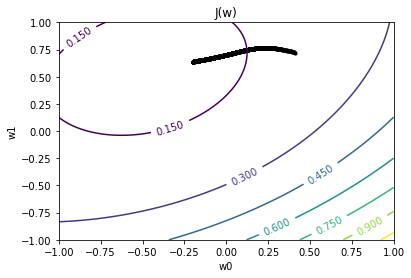

In [26]:
plot_gradient_descent(w_values)

## 6. Understanding the performance of a classifier

In [69]:
from sklearn.metrics import classification_report


# modify predictions such that they equal 1 if p >= 0.5 else 0
y_pred = list(map(lambda x: 1 if x > 0.5 else 0, predict(X,wf))) # INSERT CODE HERE
#y_pred=[1 if x>=0.5 else 0 for x in predict(X,wf) ]
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.94      0.96       498
          1       0.94      0.98      0.96       502

avg / total       0.96      0.96      0.96      1000



For a reminder about precision, recall and f1-score: 

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

Plot the confusion matrix to visualise the Type 1 and Type 2 errors (False Positive and False Negatives)

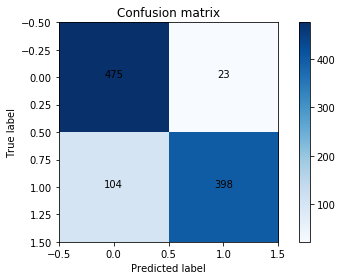

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
 
from itertools import product
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
for i, j in product(range(2), range(2)):
    plt.text(j, i, cm[i, j], horizontalalignment="center")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()
plt.show()

Plot a ROC curve and measure the AUC (Area under the Curve).

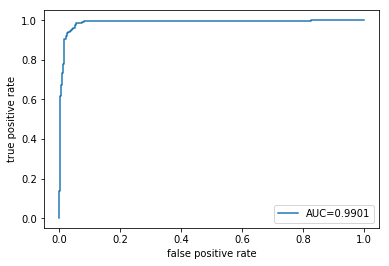

In [67]:
from sklearn.metrics import roc_curve, auc
 
# Return the model probabilities instead of the binarised predictions
y_prob = np.matrix([[1-i, i] for i in predict(X, wf)])

# Calculate the FPR and TPR at various thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:,1])
roc_auc = auc(fpr, tpr)
 
# Plot ROC curve
plt.plot(fpr, tpr, label='AUC={:.4f}'.format(roc_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

**Questions:** 
1. Explain the main elements of the ROC curve. Sketch a ROC curve for the best (100% accurate) and worst case (random predictions) models.
2. What does an AUC measures. What is the expected AUC value for the best and worst case models?

---

## Part B: Object Oriented Programming

## 1. Introduction: 
In OOP we are concerned with creating *objects* with properties rather than methods that implement actions. 

**Questions**

* What is the `__init__` method for and that is it for?

** INSERT ANSWER HERE **

* What does `self` refer to?

** INSERT ANSWER HERE **

* What are arguments and keyword arguments? Why would you choose one or the other? How are they implemented in python?

** INSERT ANSWER HERE **

## 2. class LogisticRegression:
Below you will implement the logistic regression methods above as part of a class object.

Things to consider when implementing your solution:

* What parameters should be set on initialisation? 
* What parameters should be considered class attributes?
* What should this class automatically do when initialised?
* Write a short docstring explaining each method (there are many ways to do this, see example for numpy convention).

In [70]:
def safe_log(x):
    return np.where(x==0, np.log(x+1e-10), np.log(x))

class LogisticRegression:
    
    def __init__(self): 
        self.n_iterations=1000     
     
        # assign the input arguments to class attributes
        # INSERT CODE HERE
        
        # "private" methods are preceded with an underscore in the name
        # in other programming languages such functions are treated differently
        # in Python we use this convention as an indication to the user that they are
        # intended to be called by other methods in the class and not from outside of the class
    def _safe_log(self,x):
        return np.where(x==0, np.log(x+1e-10), np.log(x))
    def _sigmoid(self, x):
        """Implements the sigmoid function
                           1
        sigmoid(x) =  -------------
                      1 + exp(-x)

        Parameters
        ----------
        x : float or iterable

        Returns
        -------
        float or iterable
        """
        return 1./(1 + np.exp(-x))
        
    def _calc_dJ_dw(self,X,y,w):
        
        m = len(y)
    
        ypred = self.predict(X,w) # INSERT CODE HERE
    
        dJ_dw = np.dot(X.T, (ypred - y)) / y.shape[0] # INSERT CODE HERE

        # Check that dJ_dw has the right shape
        assert dJ_dw.shape == w.shape

        return dJ_dw
      
        

      

    def _initialise_w(self, n_features):
        '''Initialise the weights vector w with random values.

        Parameters:
        n_features : int, number of features 

        Returns:
        w : 1d-array
        '''
        # Set a seed so we get predictable values
        np.random.seed(1)

        # create a random numpy array of features of length n_features
        w = np.random.rand(n_features)# INSERT CODE HERE

        # Check that w has the right shape
        assert w.shape == (n_features,)

        return w
      

    def _update_w(self, w, alpha, dJ_dw):
        '''Update the weights vector w.
    
        Parameters:
        w : 1d-array, weights vector
        alpha : float, learning rate
        dJ_dw : 1d-array, gradients vector

        Returns:
        new_w : 1d-array, updated weights vector
        '''    
        new_w = w - np.dot(alpha, dJ_dw) # INSERT CODE HERE

        # Check the dimensions of new_w
        assert new_w.shape == w.shape

        return new_w
        
    def cost_function(self, y, ypred):
        '''The cost function J(w) as defined in Equation (4).

        Parameters:
        ypred : 1d-array, y values predicted by model 
        y : 1d-array, true y values

        Returns:
        float, J (the cost)
        '''
        # m is the number of samples
        m = len(ypred)
        # J is the cost
        J = -1/m * np.sum(y * safe_log(ypred) + (1-y)*safe_log(1-ypred))# INSERT CODE HERE

        # Check that J is a scalar
        assert J.shape == ()

        return J
    def predict_proba(self, y_pred):
        # INSERT CODE HERE
        return  list(map(lambda x: 1 if x > 0.5 else 0, y_pred)) 
    def predict(self, X, w):
        '''The logistic regression model as defined in Equation (1).
        It takes X and w as inputs and returns a 1d-array of predictions.

        Parameters:
        X : 2d-array, shape=(n_samples,n_features)
        w : 1d-array, shape=(n_features,)

        Returns:
        ypred : 1d-array, shape=(n_samples,)
        '''
        # Check that the number of features in X is equal to the number features in the weights vector
        assert X.shape[1] == len(w)

        ypred = self._sigmoid(X.dot(w))# INSERT CODE HERE

        # Check that the number of predictions made is equal to the number of samples in X
        assert len(ypred) == X.shape[0]

        return ypred

    def fit(self, X, y, n_iterations=100, alpha=0.01, verbose=False):
        '''Fit linear regression model to data X, y.
    
        Parameters:
        X : 2d-array, feature matrix shape=(m, n_features)
        y : 1d-array, targets
        n_iterations : int, number of iterations of gradient descent
        alpha : float, learning rate
        verbose : bool, prints the cost every 10 iterations

        Returns:
        w : nd-array, final weights matrix shape=(n_features,)
        cost_values : 1d-array, cost at each iteration shape=(n_iterations,)
        w_values : nd-array, weights at each iteration shape=(n_iterations, n_features)
        '''
        n_features = X.shape[1]

        # Step 1: Initialise w at a random point
        w = self._initialise_w(n_features)# INSERT CODE HERE

        # We are going to save the values of the cost and w at each iteration for later analysis
        cost_values = [] 
        w_values = [] 

        # Repeat n_iterations times
        for i in range(n_iterations):

            # Step 2: Calculate the gradient 
            dJ_dw = self._calc_dJ_dw(X,y,w)## INSERT CODE HERE


            # Step 3: Update w
            w = self._update_w(w,alpha,dJ_dw)# INSERT CODE HERE


            # Calculate the cost 
            cost = self.cost_function( y, self.predict(X, w))# INSERT CODE HERE


            if verbose and i % 100 == 0:
                print('Iteration {}: Cost={:.6f}'.format(i, cost))

            # Save the values of the cost and w after each iteration
            cost_values.append(cost)
            w_values.append(w)

        cost_values = np.array(cost_values)
        w_values = np.array(w_values)

        return w, cost_values, w_values

In [58]:
# Edit the commands below as required

# Initialse Model
lr = LogisticRegression()

# Fit Model
w,cost_values, w_values = lr.fit(X,y,1000)

# Make Predictions
y_pred =lr.predict_proba(lr.predict(X,w))
print (y_pred)


[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 

In [59]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.94      0.96       498
          1       0.94      0.98      0.96       502

avg / total       0.96      0.96      0.96      1000



## 3. Logistic Regression using sklearn Package (easy ML)

In [33]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [34]:
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:100], y[:100])

In [35]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

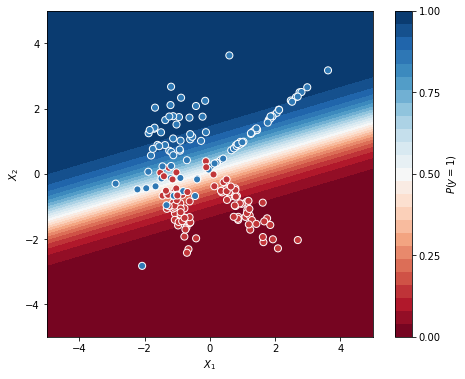

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

The above figure illustrates the decision boundary for separating between class=1 (prob >= 0.5) and class=0 (prob < 0). 